In [109]:
### --- Libraries --- ###
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

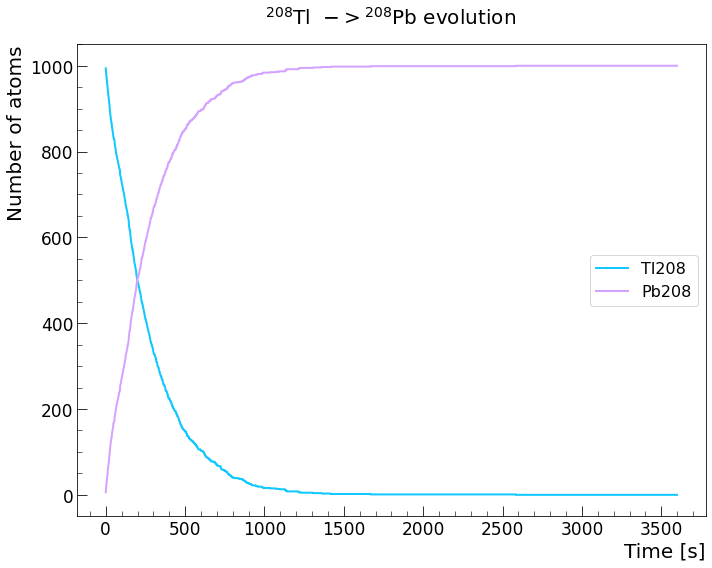

In [108]:
tau = 3.052*60    # half-life (seconds)
Tl_count = 1000   # initial value of Tl atoms
Pb_count = 0      # initial value of Pb atoms

# total time 60 minutes in step of 1 second 
time_tot = np.arange(3600)

Tl_t = np.zeros(3600)
Pb_t = np.zeros(3600)

def p(t):
    return 1 - 2**(-t/tau)

for t in time_tot:
    for i in range(Tl_count):
        x = np.random.uniform() # pick random number between 0 and 1
        if x < p(1):   # probability of decaying in 1 sec is the same as choosing x < p(1)  
            # subtract number of decayed atoms from the Tl sample and add them to the Pb sample 
            Tl_count -= 1
            Pb_count += 1 
            if Tl_count == 0: 
                break # stop when Tl population becomes zero 
    Tl_t[t] = Tl_count
    Pb_t[t] = Pb_count


fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(time_tot,Tl_t, label='Tl208', lw = 2, color = '#11C8FF')
ax.plot(time_tot,Pb_t, label='Pb208', lw = 2, color = '#D5A3FF')

# plot settings
ax.set_title('$^{208}$Tl  $ -> ^{208}$Pb evolution ', fontsize = 20, pad = 20)
ax.set_xlabel('Time [s]', fontsize = 20, loc = 'right')  
ax.set_ylabel('Number of atoms', fontsize = 20, loc = 'top')  
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 17)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()
ax.legend(loc='best', fontsize=16)

fig.tight_layout()
plt.show()


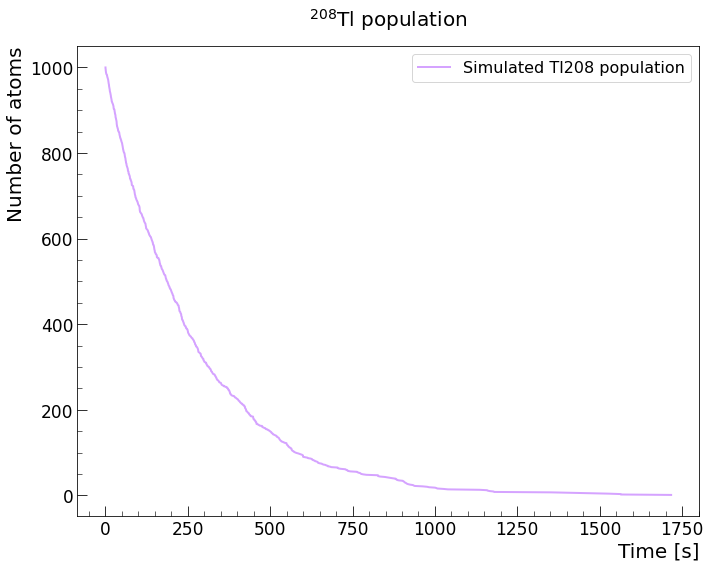

In [115]:
N_Tl0 = 1000 # initial population of Tl208 

def pdf(t):
    p = N_Tl0*2**(-t/tau)
    return p

def inv_cdf(x):
    t = -tau*(np.log(1-x)/np.log(2))
    return t

# draw 1000 random numbers following the non-uniform probability distribution 
u = np.random.uniform(0,1,1000)
v = np.sort(inv_cdf(u)) # sort decay times from lowest to highest 

y = range(1000,0,-1) # 0 to 1000 in reverse

fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(v,y, label='Simulated Tl208 population', lw = 2, color = '#D5A3FF')

# plot settings
ax.set_title('$^{208}$Tl population', fontsize = 20, pad = 20)
ax.set_xlabel('Time [s]', fontsize = 20, loc = 'right')  
ax.set_ylabel('Number of atoms', fontsize = 20, loc = 'top')  
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 17)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()
ax.legend(loc='best', fontsize=16)

fig.tight_layout()
plt.show()

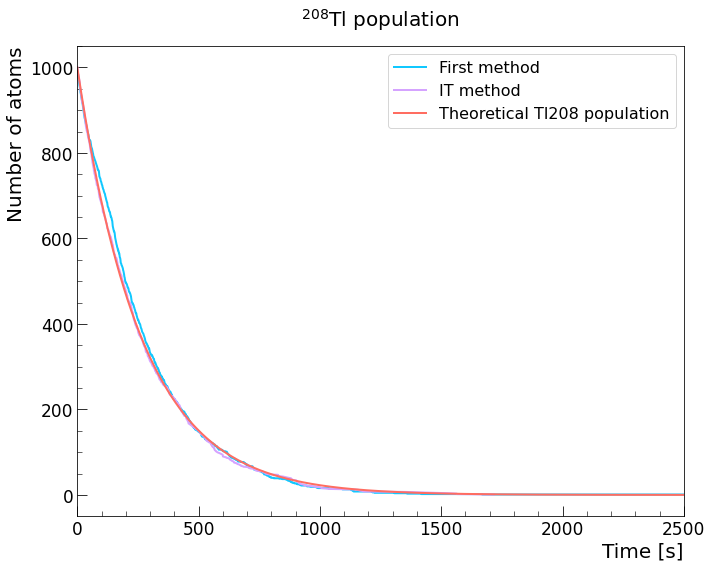

In [116]:
# compare different methods and theoretical expectations 
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(time_tot,Tl_t, label='First method', lw = 2, color = '#11C8FF')
ax.plot(v,y, label='IT method', lw = 2, color = '#D5A3FF')
ax.plot(time_tot, pdf(time_tot), label='Theoretical Tl208 population', lw = 2, color = '#FF6D61')

# plot settings
ax.set_xlim(-0.5,2500)
ax.set_title('$^{208}$Tl population', fontsize = 20, pad = 20)
ax.set_xlabel('Time [s]', fontsize = 20, loc = 'right')  
ax.set_ylabel('Number of atoms', fontsize = 20, loc = 'top')  
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 17)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()
ax.legend(loc='best', fontsize=16)

fig.tight_layout()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

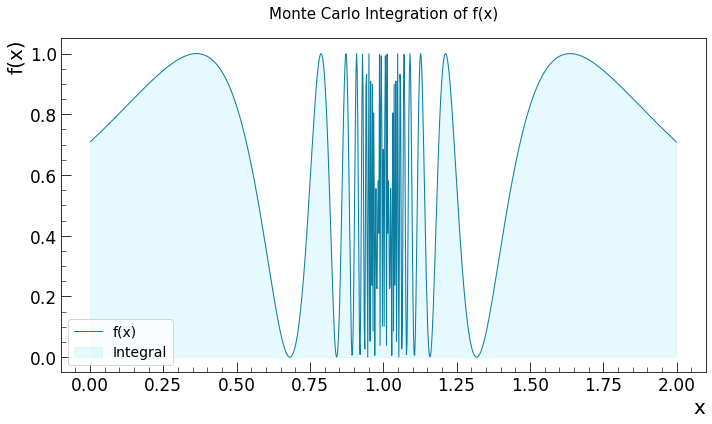

In [118]:
def f(x):
    f = (np.sin(1/(1-x)))**2
    return f


fig,ax = plt.subplots(1,1,figsize=(10,6))

x = np.linspace(0.001, 1.999, 1000)


ax.plot(x,f(x), label='f(x)', lw = 1, color = '#0B7D9F')
ax.fill_between(x, f(x), where=[(x > 0) and (x < 2) for x in x], color = '#11C8FF' , alpha = 0.1, label = 'Integral')

# plot settings
ax.set_title('Monte Carlo Integration of f(x)', fontsize = 15, pad = 20)
ax.set_xlabel('x', fontsize = 20, loc = 'right')  
ax.set_ylabel('f(x)', fontsize = 20, loc = 'top')  
ax.tick_params(axis = 'both', which = 'major', direction = 'in', length = 10, labelsize = 17)
ax.tick_params(axis = 'both', which = 'minor', direction = 'in', length = 5)
ax.minorticks_on()
ax.legend(loc='best', fontsize=14)

fig.tight_layout()
plt.show()

In [55]:
# Monte Carlo integration
N = 100000

sample_hs = []

# compute the integral 100 times
for j in range(100):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x):
            count += 1
    I = 2 * count / N
    sample_hs.append(I)

# evaluate mean and mean error (std/sqrt(N)) of our sample of integrals 
I_hm = np.mean(sample_hs)
err_hm = np.std(sample_hs)/np.sqrt(100)
print('Integral with hit/miss method: {:1.4f} ± {:1.4f}'.format(I_hm, err_hm))

Integral with hit/miss method: 1.3465 ± 0.0003


In [54]:
# Mean value method

sample_mv = []

for j in range(100):
    x = 2 * np.random.random(N) # probe uniformly at random the function domain
    I_mv = (2/N)*np.sum(f(x)) 
    sample_mv.append(I_mv)


I_mv = np.mean(sample_mv)
err_mv = np.std(sample_mv)/np.sqrt(100)
print('Integral with mean value method: {:1.4f} ± {:1.4f}'.format(I_mv, err_mv))


Integral with mean value method: 1.3466 ± 0.0002


In [60]:
I_true = 1.34691
print('The true value of the integral is:', I_true)

# estimate relative errors 
delta_hm = np.abs(I_hm-I_true)
delta_mv = np.abs(I_mv-I_true)

print('\nRelative error for hit/miss method:',(delta_hm/I_true) * 100,'%')
print('Relative error for mean value method:',(delta_mv/I_true) * 100,'%')

print('Compatibility for hit/miss method:',(delta_hm/err_hm))
print('Compatibility for mean value method:',(delta_mv/err_mv))

print('\nGenerally the mean value method yields better results, i.e. with a smaller relative error.')


The true value of the integral is: 1.34691

Relative error for hit/miss method: 0.032504027737582 %
Relative error for mean value method: 0.025214481628235245 %
Compatibility for hit/miss method: 1.5763670864230654
Compatibility for mean value method: 1.8202597997796939

Generally the mean value method yields better results, i.e. with a smaller relative error.


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [63]:
# 2D circle
def f(x,y):
    if x**2 + y**2 <= 1: 
        return 1
    else: 
        return 0

N = 1000000 # number of samples
A = 2*2 # integration volume
v = np.vectorize(f)

sample_area = []

# compute the area 100 times
for i in range(100):
    x = np.random.uniform(-1,1,N) # probe uniformly at random the function domain [-1,1]
    y = np.random.uniform(-1,1,N)
    area = (A/N) * np.sum(v(x,y)) # using mean value method
    sample_area.append(area)

area_mv = np.mean(sample_area)
err_area = np.std(sample_area)/np.sqrt(100)

print('The area of a circle of radius 1 is:', np.pi)
print('The result obtained with mean value method is:', area_mv)
print('The relative error is:', 100*abs(np.pi-area_mv)/np.pi,'%')


The area of a circle of radius 1 is: 3.141592653589793
The result obtained with mean value method is: 3.14165244
The relative error is: 0.001903060542832301 %


In [68]:
# generalize to 10D sphere
def sph_10d(r):
    if r <= 1: 
        return 1
    else: 
        return 0


N = 1000000 # number of samples
V = 2**10 # integration volume
v10 = np.vectorize(sph_10d)

r_c = np.random.uniform(-1,1, size = (N,10)) # probe uniformly at random the function domain for each coordinate [-1,1]
r = np.sum(r_c**2,axis=1)

v10 = np.vectorize(sph_10d)
vol10D_mv =  (V/N) * np.sum(v10(r))  # using mean value method
real_vol = np.pi**(5)/(120)    # real volume of 10D sphere

print('The real volume of the 10D sphere of radius 1 is:', real_vol)
print('The result obtained with mean value method is:', vol10D_mv)
print('The relative error is:',  100*abs(real_vol-vol10D_mv)/real_vol,'%')

The real volume of the 10D sphere of radius 1 is: 2.550164039877345
The result obtained with mean value method is: 2.608128
The relative error is: 2.272950257954488 %


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [80]:
I_true = 0.838932960 # true value

def f(x):
    f = 1/((np.exp(x)+1)*np.sqrt(x))
    return f

def w(x):
    return 1/np.sqrt(x)

y = np.random.uniform(0,1,N)**2 # doing the square we can focus the sampling around zero
N = 100000

w_int = 2 # integral of weight function in the interval [0,1]
I_is = (1/N) * np.sum(f(y)/w(y)) * w_int


print('The true value is:', I_true, '\n')
print('The result obtained with importance sampling method is:', I_is)
print('The relative error is:', 100*abs(I_true-I_is)/I_true,'%')




The true value is: 0.83893296 

The result obtained with importance sampling method is: 0.83799227778026
The relative error is: 0.11212841366251416 %
